In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

data = pd.read_csv('data/listings.csv')

# Import of the right libraries

Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn


# Division of labor ##

We did this entire project together with pair programming.
We got together and devided smaller task and combined our findings in bigger cells regularly.
The table below shows the division of labor, but as said before, we rarely worked alone and helped each other out even when it wasn't our particular subject.

| Work                                                  | Lucas Derveaux | Bavo Persyn | Tibo Vandercruyssen |
|-------------------------------------------------------|:--------------:|:-----------:|:-------------------:|
| Preprocessing                                         | X              | X           | X                   |
| Visualising data (scatterplots and correlationmatrix) | X              | X           | X                   |
| Eliminating Outliers                                  | X              |             | X                   |
| Investigating Description/Amenities                   | X              |             | X                   |
| Lineair Regression                                    | X              |             | X                   |
| Decision Trees                                        |                | X           |                     |
| K-nearest Neighbours                                  |                | X           |                     |

# Data preprocessing

In [2]:
data
# First visual look of the given data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


In [3]:
data_cleaned = data
# Some columns are shifted by an excessive comma. We shifted these columns by looking for errors in 'host_since'.
shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]

for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + ", " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]
# The column Neighbourhood_overview contains a comma that got wrongfully parsed, the second part of neighbourhood_overview got wrongfully
# placed in the next column
# The for-loop above fixes this problem

data_cleaned = pd.concat([data_cleaned, shifted])

# We drop the last column as it is a useless column created by the excessive comma.
data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

# Verification of datacleaning
data_cleaned

C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


In [4]:
# We can't use host_since in our model-training because we need numerical values so we change it to a numeric value
# The value represents the amount of days the person has been a host
data_cleaned['host_since'] = np.datetime64('today') - pd.to_datetime(data_cleaned['host_since'])
data_cleaned['host_since'] = data_cleaned['host_since'].astype(str).str.replace(' days', '').astype(int)
data_cleaned['host_since'].dtype


dtype('int32')

In [5]:
#verification
data_cleaned['host_since'].dtype

dtype('int32')

In [6]:
# Because of the shift, the types of some values aren't right anymore

data_cleaned['longitude'] = data_cleaned['longitude'].astype(float)
data_cleaned['latitude'] = data_cleaned['latitude'].astype(float)


In [7]:
# Change boolean values t (true) and f (false) to 1 and 0
data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].replace('t', 1).replace('f', 0)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].replace('t', 1).replace('f', 0)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].replace('t', 1).replace('f', 0)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].replace('t', 1).replace('f', 0)


In [8]:
# The center of Ghent lies at 51.0544707, 3.7236719 (https://www.coordinatenbepalen.nl/coordinates/107915-gent-centrum)
# We calculate de distance of each listing to the center
from math import radians, cos, sin, asin, sqrt

ghent_lat = 51.0544707
ghent_long = 3.7236719


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in data_cleaned.iterrows():
    data_cleaned.loc[index, 'distance_to_center'] = haversine(ghent_long, ghent_lat, row['longitude'], row['latitude'])

df = data_cleaned.drop(["latitude", "longitude"], axis=1)


In [9]:
# NaN is set to 0 because there is no separate place to sleep, but we assume there is at least one place to sleep. 
# We investigated the data and discovered that it is always a studio, lounge or a condo.

data_cleaned['bedrooms'] = data_cleaned['bedrooms'].replace(np.NAN, 0).astype(int)
data_cleaned['beds'] = data_cleaned['beds'].replace(np.NAN, 0).astype(int)


In [10]:
# Changing the accomodates column to the right type
data_cleaned['accommodates'] = data_cleaned['accommodates'].astype(int)


In [11]:
# The data in 'room_type' is one of four possibilities: Entire home/apt, Private room, Shared room or Hotel. 
# This data isn't a numerical value so we can't use that to train our model, so what we could do is replace them with a number between 0 and 3.
# The problem with this is that the model might assume some kind of order or hierarchy. 
# One-hot encoding is a better solution to this problem.

a = pd.get_dummies(data_cleaned['room_type'], prefix="room_type")

frames = [data_cleaned, a]
data_cleaned = pd.concat(frames, axis=1)


data_cleaned.drop(['room_type'], inplace=True, axis=1)

data_cleaned.rename(
    columns={
        "room_type_Private room": "room_type_private", 
        "room_type_Entire home/apt": "room_type_entire", 
        "room_type_Hotel room": "room_type_hotel", 
        "room_type_Shared room": "room_type_shared"}, 
        inplace=True
    )


In [12]:
# Changing the price to a numeric value instead of a string with a dollar-sign

data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\bavop\AppData\Local\Temp/ipykernel_2956/3496205334.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


In [13]:
# The bathrooms_text contains a numerical value for the amount of bathrooms in the listing. In this cell that numeric value is extracted.
test=[]

for x in data_cleaned['bathrooms_text'].str.findall('\d[\.]*[\d]*'):
  if len(x)!=0:
    test.append(float(x[0]))
  else:
    test.append(float(0))

data_cleaned['bathrooms'] = test

data_cleaned.loc[:,['bathrooms','bathrooms_text']]


,bathrooms,bathrooms_text
0,1.5,1.5 baths
1,1.0,1 bath
2,1.0,1 bath
3,1.5,1.5 baths
4,2.5,2.5 baths
...,...,...
515,1.0,1 bath
516,1.0,1 bath
537,1.0,1 shared bath
841,1.0,1 private bath


In [14]:
# set columns to correct type
data_cleaned['host_listings_count'] = data_cleaned['host_listings_count'].astype(int)

data_cleaned['availability_30'] = data_cleaned['availability_30'].astype(int)
data_cleaned['availability_60'] = data_cleaned['availability_60'].astype(int)
data_cleaned['availability_90'] = data_cleaned['availability_90'].astype(int)
data_cleaned['availability_365'] = data_cleaned['availability_365'].astype(int)

data_cleaned['review_scores_rating'] = data_cleaned['review_scores_rating'].astype(float)
data_cleaned['number_of_reviews'] = data_cleaned['number_of_reviews'].astype(float)

data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].astype(int)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].astype(int)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].astype(int)
data_cleaned['number_of_reviews_ltm'] = data_cleaned['number_of_reviews_ltm'].astype(int)
data_cleaned['number_of_reviews_l30d'] = data_cleaned['number_of_reviews_l30d'].astype(int)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].astype(int)


C:\Users\bavop\AppData\Local\Temp/ipykernel_2956/2714430481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withDescription['descr'] = 1
C:\Users\bavop\AppData\Local\Temp/ipykernel_2956/2714430481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutDescription['descr'] = 0


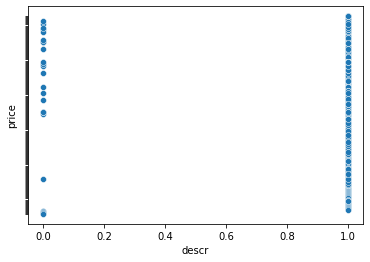

In [15]:
# Without description, the price is always high. This doesn't make much sense and seeing as only 25 of the 923 records don't have a description we don't use it.

withDescription = data[data['description'].isnull()==False]
withDescription['descr'] = 1
withoutDescription = data[data['description'].isnull()==True]
withoutDescription['descr'] = 0

descrip = pd.concat([withDescription, withoutDescription])

g = sns.scatterplot(x=descrip['descr'], y=descrip["price"])
g.set(yticklabels=[])  
plt.show()


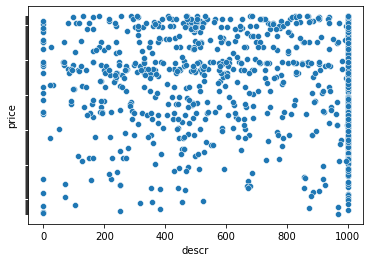

In [16]:
from sklearn.preprocessing import StandardScaler

# Some listings don't have a description, others are more ellaborate. We investigated the possibility of a correlation between the length
# of a description and the price of a listing. 
# We found out that there wasn't a direct correlation.

descrLength = data
descrLength['descr'] = descrLength['description'].str.len()
descrLength['descr'] = descrLength['descr'].replace(np.nan, 0)
descrLength


g = sns.scatterplot(x=descrLength['descr'], y=descrLength["price"])
g.set(yticklabels=[])  
plt.show()


In [17]:
import ast

# We looked at the unique amenities that listings have to offer to see if there are possibilities of correlations with the price.
# since there are a lot of amenities available we decided not to do anything with this.

amenity = []
for x in data_cleaned['amenities']:
    x = ast.literal_eval(x)
    for y in range(0, len(x)):
        if x[y] not in amenity:
            amenity.append(x[y])


# print(amenity)




We were going to use the review_scores but as there are quite a lot that haven't been filled in (NaN), we decided not to use them. As we thought either assigning a 0 or the average score would be skewing the data.

In [19]:
# Features investigated in our model

features = [
    'host_since', 
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'distance_to_center',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    # 'review_scores_rating',
    # 'review_scores_accuracy',
    # 'review_scores_cleanliness',
    # 'review_scores_checkin',
    # 'review_scores_communication',
    # 'review_scores_location',
    # 'review_scores_value',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'instant_bookable'
]

In [20]:
# We drop all the columns that we won't use in this sprint
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'distance_to_center', 'room_type_entire',
       'room_type_hotel', 'room_type_private', 'room_type_shared'],
      dtype='object')

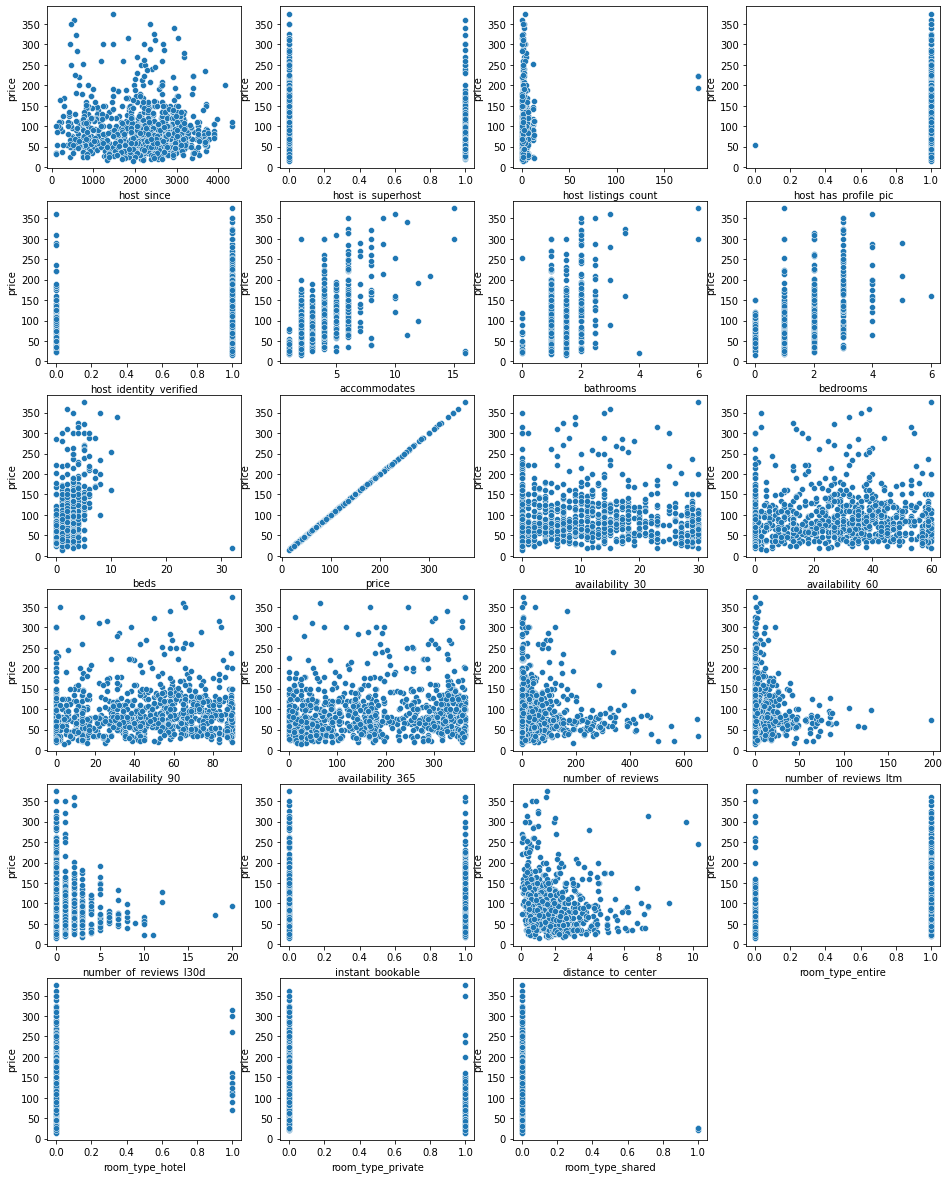

In [21]:
# Plots of the correlations betwee feature values and the price of listings.

plt.figure(figsize=(16,28))
for i, k in enumerate(data_cleaned.keys()):
    plt.subplot(8, 4, 1+i)
    sns.scatterplot(x=data_cleaned[k], y=data_cleaned["price"])

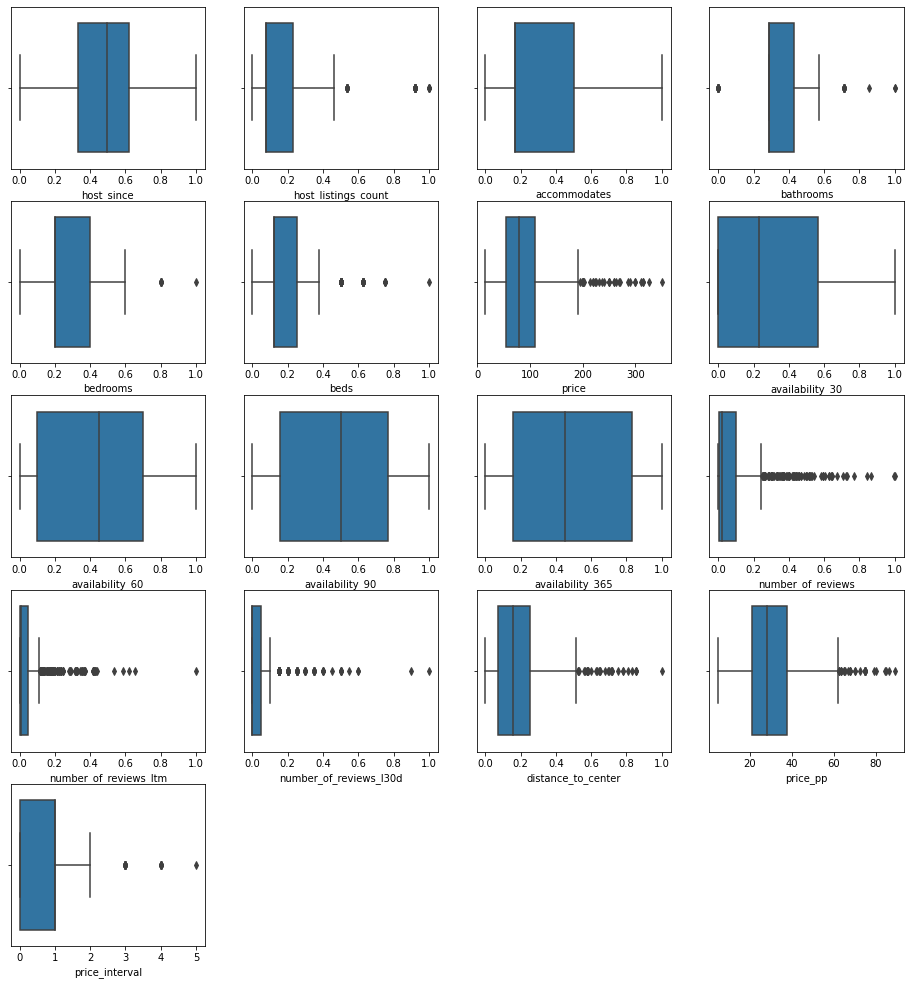

In [156]:
# Box plots of features to see if there are extreme outliers.

box = data_cleaned
box = box.drop(columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 
                    'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared'])

plt.figure(figsize=(16,28))
for i, k in enumerate(box.keys()):
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=box[k])




In the plots upwards we have multiple graphs with extreme outliers. Especially host_listings_counts and beds.
In the graph of the column 'accommodates', which we have shown once more in the cell below, there are multiple outliers that we have chosen to discard.
Aforementioned rows were discarded because we felt that an AirBNB that accommodates more than 8 people is very unique. It makes sense that those accomodations accompany a higher price range than smaller listings meant for a family or a small group of friends.

<AxesSubplot:xlabel='price'>

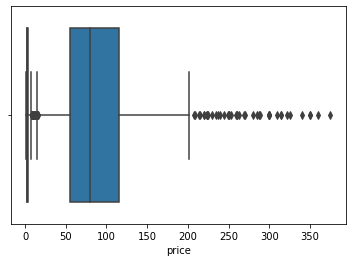

In [23]:
sns.boxplot(x=box['accommodates'])

sns.boxplot(x=box['price'])


In [24]:
# Removing the items with extreme outliers

data_cleaned = data_cleaned[data_cleaned['host_listings_count']<=50]
data_cleaned = data_cleaned[data_cleaned['beds']<=15]
data_cleaned = data_cleaned[data_cleaned['accommodates']<=7]

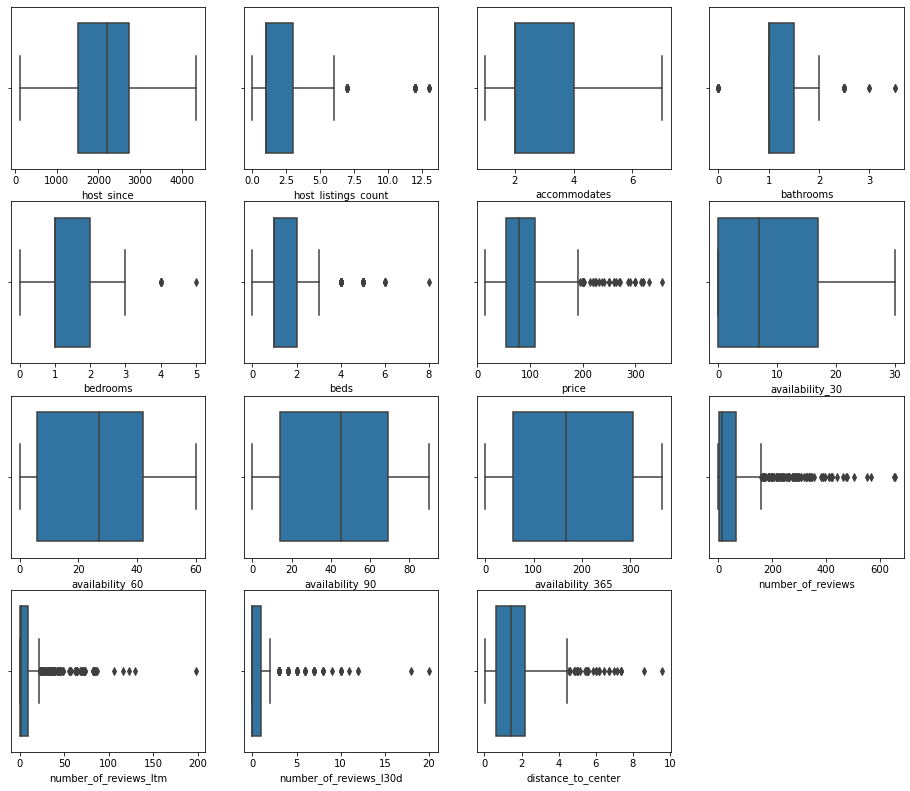

In [25]:
# Visual confirmation that the data of the features looks better without outliers.

box = data_cleaned
box = box.drop(columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 
                    'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared'])

plt.figure(figsize=(16,28))
for i, k in enumerate(box.keys()):
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=box[k])



<AxesSubplot:>

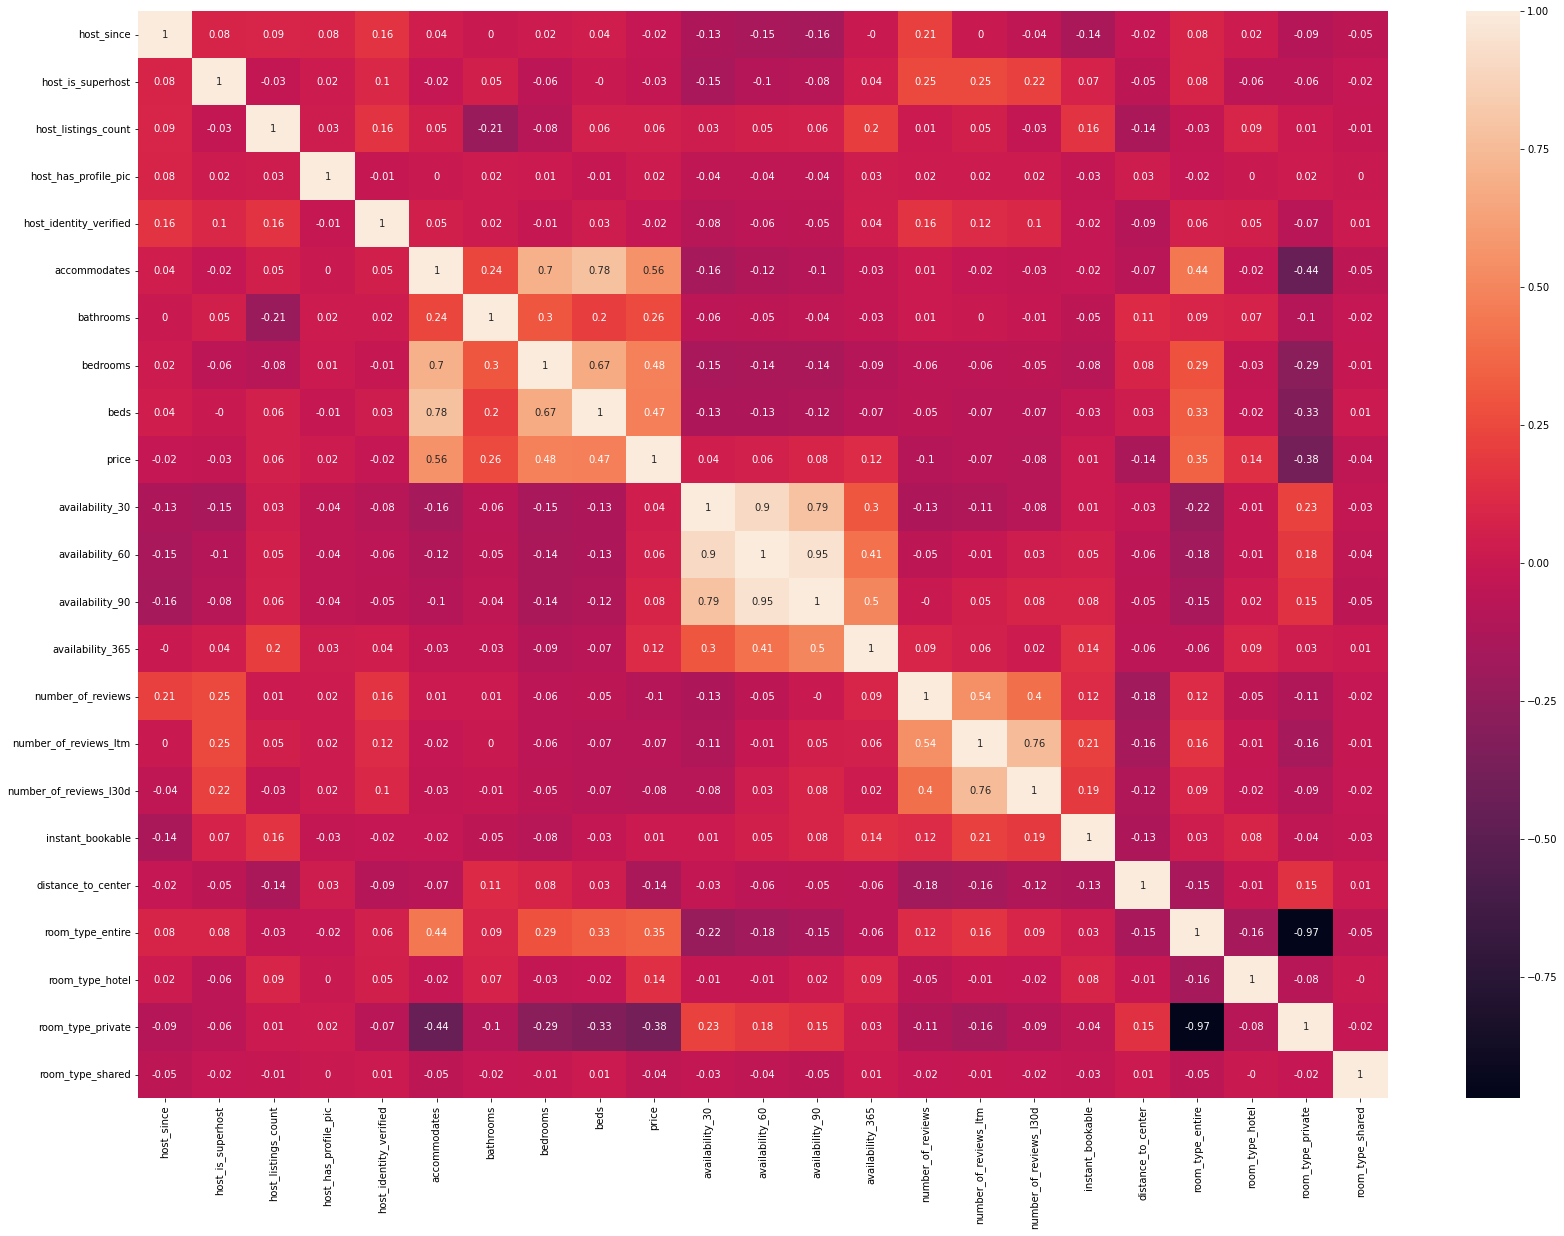

In [26]:
# Correlation matrix of chosen features.

correlation_matrix = data_cleaned.corr().round(2)
plt.figure(figsize=(28,20))
sns.heatmap(data=correlation_matrix, annot=True)

This correlationmatrix gives us an indication of which factors have a correlation with the price. A positive correlation close to 1 means that the price behaves more or less directly proportional to that factor (the closer the correlation is to 1, the more this is true). A negative correlation close to -1 means the price will behave more or less inversly proportional to that factor (once again, a correlation closer to -1 means the price will behave more inversly proportional to that factor).

We will now make a decision tree based on these features. The tree will automatically choose the best feature for each division.  

# Linear Regression
In order to find out which columns have the best linear trend in function of the price we used the Linear Regression from scikit-learn. We calculated the Root Mean Squared Error (RMSE) of every column in our features and sorted the dictionary based on the values. The best linear trends are orderd from top to bottom.

In [27]:
# Linear regression
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
RMSE_dictionary = {}

X = data_cleaned.drop(['price'], axis=1)
Y = data_cleaned['price']


# We delete the review_scores because a lot of its values is not a number which means that we cannot use in our regression model
for feature in X.columns:
    if re.match("review_scores_*", feature):
        X = X.drop(feature, axis=1)


for i in X.columns:
    X2 = pd.concat([X[i]], axis=1)

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)


    lin_model.fit(X_train, Y_train)

    # model evaluation for training set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    RMSE_dictionary[i] = rmse
    

RMSE_sorted = sorted(RMSE_dictionary.values())
sorted_dictionary = {}

for i in RMSE_sorted:
    for k in RMSE_dictionary.keys():
        if(RMSE_dictionary[k] == i):
            sorted_dictionary[k] = RMSE_dictionary[k]
            break

for i in sorted_dictionary.keys():
    print(i, "\t", sorted_dictionary[i])



host_identity_verified 	 41.52570789513611
accommodates 	 42.48893990403857
number_of_reviews_ltm 	 43.33777151484993
room_type_entire 	 43.990088924573726
bedrooms 	 44.81437518820771
bathrooms 	 46.18966475738853
instant_bookable 	 47.611356470474526
room_type_hotel 	 47.75223356950378
beds 	 47.92462115322493
host_has_profile_pic 	 49.676901436728855
availability_30 	 49.93346791984052
host_since 	 50.076881287059784
availability_90 	 50.59105989370683
number_of_reviews_l30d 	 51.15996423153727
room_type_private 	 51.24533658158434
availability_365 	 52.03370000563062
host_listings_count 	 52.121945302362256
room_type_shared 	 53.398190385651425
number_of_reviews 	 53.69714519799529
availability_60 	 54.61229136991797
distance_to_center 	 54.94807717686963
host_is_superhost 	 62.02410455381356


# Decision Trees

We'll now look for a decision tree based on the features that have the most effect on the price. 

In [28]:
# First we need to divide our data in a train- and testset
import sklearn.model_selection as model_selection

X = data_cleaned.drop(['price'], axis=1)
Y = data_cleaned['price']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
# This function is used to visualize the results (as the name suggests)

def visualize_results(predictions, ground_truth):
    
    plt.scatter(ground_truth, predictions, alpha=0.5)
    plt.xlabel("Ground truth price")
    plt.ylabel("Predicted price")
    plt.show()
    
    rmse = (np.sqrt(mean_squared_error(ground_truth, predictions)))
    r2 = r2_score(ground_truth, predictions)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

The code below makes a tree based upon the most important features (what those features are, we'll discuss later). 

In the graph we see the Predicted Price, being the price our model predicts and the Ground Truth Price which is the actual price of the listing.
An ideal model would predict the actual price, this would show a graph where all points are on a straight line through the center. In our graph this is not the case, although we can an upgoing trend. But this is not at all an indication of a good model being able to predict the value of a listing.

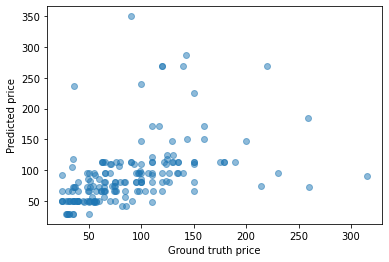

RMSE is 52.75593359104029
R2 score is -0.1058083364783644


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# DecisionTree from the scikit-learn with our cleaned_data

tree = DecisionTreeRegressor(max_depth=7)
tree = tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

visualize_results(predictions, Y_test)

The code below is used to find the ideal max depth of the tree. Experimenting with different values.

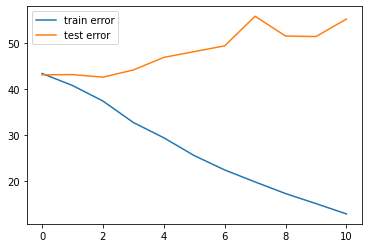

3 42.62266696780426


In [32]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

rmse_train = []
rmse_test = []

rmse_min = 1000
depth_min = 0

for depth in range(1, 12):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree = tree.fit(X_train, Y_train)
    
    predictions = tree.predict(X_train)
    rmse_train.append((np.sqrt(mean_squared_error(Y_train, predictions))))
    

    predictions = tree.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, predictions)))
    if rmse < rmse_min:
        depth_min = depth
        rmse_min = rmse
    rmse_test.append(rmse)
    
plt.plot(rmse_train, label="train error")
plt.plot(rmse_test, label="test error")
plt.legend()
plt.show()

model = DecisionTreeRegressor()
print(depth_min, rmse_min)

The plot above shows us that a tree with a depth higher than 3 isn't necessarily better. As you can see, a higher depth makes sure the train error decreases, but the test error stays quite the same, and even increases. This is because the model is overtrained, it gets used to the training data and shapes itself to much to that input. As a result, new data is difficult to work with. The value 3 isn't fixed, this is for this particular data (and this particular split between data). The code below shows an overview of the importance of each feature in our tree. As you can see, in our tree the accomodates of a listing is the most important factor for the price, followed by the number of bathrooms and the distance to the center of Ghent.

In [33]:
imp_feat=pd.Series(tree.feature_importances_,index=X_train.columns.tolist())
imp_feat.sort_values(ascending=False)

bedrooms                  0.254407
distance_to_center        0.172940
accommodates              0.080004
availability_30           0.070776
availability_90           0.066738
bathrooms                 0.055182
host_since                0.054050
number_of_reviews         0.039252
availability_365          0.039056
beds                      0.027648
availability_60           0.027003
number_of_reviews_ltm     0.024334
room_type_private         0.023542
host_identity_verified    0.021978
host_listings_count       0.013472
instant_bookable          0.010968
room_type_entire          0.008765
host_is_superhost         0.005017
number_of_reviews_l30d    0.004207
room_type_hotel           0.000661
host_has_profile_pic      0.000000
room_type_shared          0.000000
dtype: float64

We think there's a difference between an airbnb for 1 person, costing €50/night and an airbnb for 2 persons for the same price. That's why we wanted to look for links with the price per person instead of the price per airbnb. To calculate the price per person, we devided the price by the number of acommodates. We assumed that the number of accomodates is indeed the number of clients that stay at the airbnb, so that's the price per person. We have one big outlier of €150 per person, which we removed to have a clearer view.

In [34]:
data_cleaned['price_pp'] = data_cleaned['price'] / data_cleaned['accommodates']
data_cleaned = data_cleaned[data_cleaned['price_pp'] < 100]

In [35]:
X = data_cleaned.drop(['price', 'price_pp'], axis=1)
Y = data_cleaned['price_pp']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [36]:
import re
for feature in X_train.columns:
    if re.match("review_scores_*", feature):
        X_train = X_train.drop(feature, axis=1)
        X_test = X_test.drop(feature, axis=1)

Once again we have a graph that shows the Predicted Price versus the Ground Truth Price. Once again we don't realy see the straight line we want to see. But the R²-score is going more in the right direction.

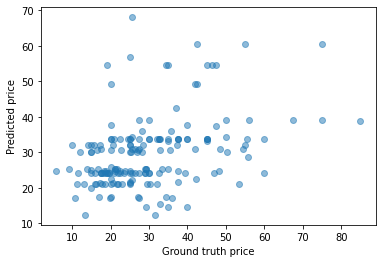

RMSE is 13.258658251744317
R2 score is 0.03903015346308669


In [37]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(max_depth=7)
tree = tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

visualize_results(predictions, Y_test)

We look for the ideal max depth once again, keeping overfitting in our mind once again.

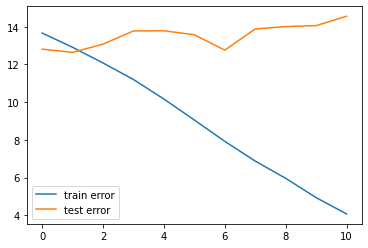

2 12.639185847388626


In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

rmse_train = []
rmse_test = []

rmse_min = 1000
depth_min = 0

for depth in range(1, 12):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree = tree.fit(X_train, Y_train)
    
    predictions = tree.predict(X_train)
    rmse_train.append((np.sqrt(mean_squared_error(Y_train, predictions))))
    

    predictions = tree.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, predictions)))
    if rmse < rmse_min:
        depth_min = depth
        rmse_min = rmse
    rmse_test.append(rmse)
    
plt.plot(rmse_train, label="train error")
plt.plot(rmse_test, label="test error")
plt.legend()
plt.show()

model = DecisionTreeRegressor()
print(depth_min, rmse_min)

It's worth taking a look at the tree we just created. Every time the model has to predict a new value, it takes descends down the tree. In each node, the model only looks at the feature of that node and depending on the value of the new AirBnb goes left/right. Arriving in the right node, it gives an indication of what the price per person should be. In this case we should multiply it with the number of accomodates once again to get the price per night for the AirBnb.

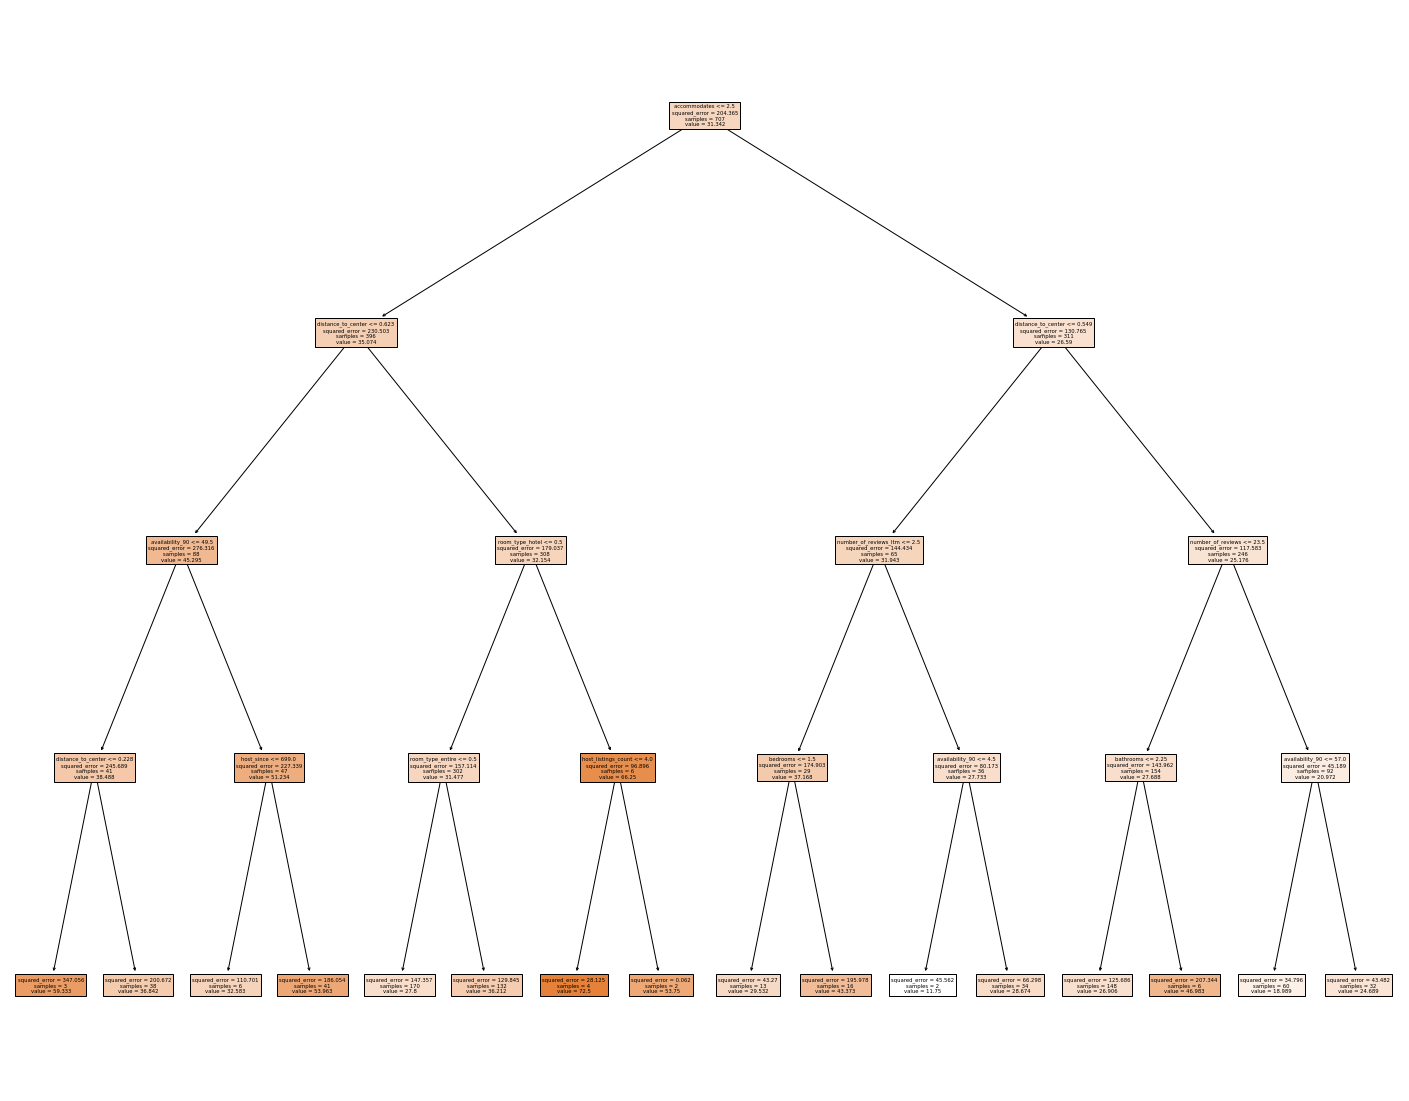

In [39]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(max_depth=4)
tree = tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

# visualize_results(predictions, Y_test)

fig = plt.figure(figsize=(25,20))

_ = plot_tree(tree, filled=True, feature_names = X_train.columns)

We now see that the distance to the center of Ghent has taken a more important role, whereas the importance of the number of accommodates has decreased. This doesn't come as a surprise, it's only logical that an appartment for 6 persons is more expensive than an appartment where only 2 people can sleep. So if we take the price per person, this becomes less relevant. The availability is another more prominent feature in our new tree. 

In [40]:
imp_feat=pd.Series(tree.feature_importances_,index=X_train.columns.tolist())
imp_feat.sort_values(ascending=False)

distance_to_center        0.278944
accommodates              0.224487
room_type_hotel           0.127359
room_type_entire          0.094137
availability_90           0.085522
number_of_reviews         0.046511
host_since                0.042834
bathrooms                 0.041616
number_of_reviews_ltm     0.025598
bedrooms                  0.024599
host_listings_count       0.008392
beds                      0.000000
availability_30           0.000000
availability_60           0.000000
host_is_superhost         0.000000
availability_365          0.000000
number_of_reviews_l30d    0.000000
instant_bookable          0.000000
host_identity_verified    0.000000
host_has_profile_pic      0.000000
room_type_private         0.000000
room_type_shared          0.000000
dtype: float64

# K nearest neighbours

With K nearest neighbours we try to find the category an entry belongs to. As there are no actual categories, we decided to create them by splitting the prices into intervals. We divided the price in 5 intervals (represented by the factor of their lower bound).

So when we have a new listing, we look at the listings that are the closest to the new listing and base our price range on those listings.

In [41]:
step = (data_cleaned['price'].max() - data_cleaned['price'].min() )/ 5
data_cleaned['price_interval'] = data_cleaned['price'] // step # * step
# data_cleaned['price_interval'].sort_values()

We normalize the data so every feature has the same impact.

In [42]:
columns = [
    'host_since', 
    'host_listings_count',
    'distance_to_center',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d']

data_cleaned[columns] = (data_cleaned[columns] - np.min(data_cleaned[columns])) / (np.max(data_cleaned[columns]) - np.min(data_cleaned[columns])).values
# data_cleaned.describe()


In [100]:
# Splitting data in train- and test-set

Y = data_cleaned['price'].values
intervals = data_cleaned[['price_interval']].values
X = data_cleaned.drop(['price', 'price_pp', 'price_interval'], axis=1)
X_train, X_test, Y_train, Y_test, intervals_train, intervals_test = train_test_split(X,Y,intervals, test_size = 0.2,random_state=0)


This is a simple class like we used in the lab sessions. What it does is look for the K neirest neighbours (like the name suggests) and look at the price. K is given as an initilizer parameter. From the K neirest neighbours, the avarage pricerange is calculated, giving the category of the new entry.

The variable *Y* doesn't actually contain the categories (intervals) but the prices itself, we use the variable *intervals* for that. If we work with the intervals as the actual price and take the average of those laying closest to our new entry, we generalize too much. That's why we use the actual prices to calculate the new price and check whether the price is indeed in the right category.

In [101]:
from sklearn.neighbors import KDTree

class MyKNeighborsClassifier:
    def __init__(self, k):
        self.k = k
    def fit(self, x, y):
        self.tree = KDTree(x)
        self.y = y
    def predict(self, x):
        _, ind = self.tree.query(x, k=self.k)
        # print(self.y[ind].mean(axis=1))
        return self.y[ind].mean(axis=1)

In [132]:
knn = MyKNeighborsClassifier(50)
knn.fit(X_train, Y_train)
predictions = np.ceil(knn.predict(X_test)) // step
# predictions

The accuracy is based on the amount of good predictions. We count it as a good predicition if the model predicts the right category.

In [133]:
accuracy = (predictions == intervals_test).mean()
print('%.2f' % (accuracy*100), '%')

47.91 %


As said in the lab session, K is a hyperparameter. We try to find the optimal by trying some and plotting the accuracy with respect to K. We find that 49 is the optimal K in our case.

49 0.4790768936129465


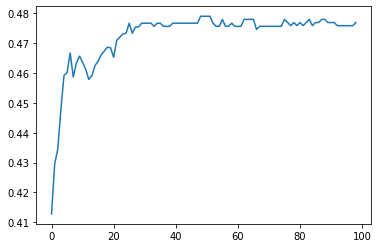

In [137]:
maxAcc = 0
bestK = 0
accuracies = []
for k in range(1, 100):
    knn = MyKNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    predictions = np.ceil(knn.predict(X_test)) // step
    acc = (predictions == intervals_test).mean()
    if acc > maxAcc:
        maxAcc = acc
        bestK = k
    accuracies.append(acc)
plt.plot(accuracies)
print(bestK, maxAcc)

There's a 'but' to this story, we need to be carefull with this analysis of our K-value. It could be that this K happens to be a good K for this particular split of train- and test-set. To make sure this is not the case we could split the dataset in 3 parts. Train- and test-set as usual, with an additional set to test the K hyperparameter. The usal test-set is to check the model when it's done and can't be used earlier. This is what we do below.

In [142]:
# Splitting data in train- and validation and test-set

Y = data_cleaned['price'].values
intervals = data_cleaned[['price_interval']].values
X = data_cleaned.drop(['price', 'price_pp', 'price_interval'], axis=1)
X_train, X_inter, Y_train, Y_inter, intervals_train, intervals_inter = train_test_split(X,Y,intervals, test_size = 0.3,random_state=0)
X_val, X_test, Y_val, Y_test, intervals_val, intervals_test = train_test_split(X_inter, Y_inter, intervals_inter, test_size=0.33, random_state=0)


In the first step (the for loop with plot), we look for the best value for our hyperparameter K. We do this with the train- and validation-set. After that we use the best value for our parameter K to train the model. We now check the accuracy using our test-set. As we see, the accuracy doesn't change much if we us the model on the test-set. This proves that the value found for K is not just a good parameter for the validation-set but also for new values.

Best accuracy:  46.09 %
Accurcy on test-set 47.96 %


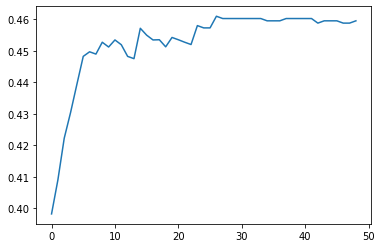

In [152]:
maxAcc = 0
bestK = 0
accuracies = []
for k in range(1, 50):
    knn = MyKNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    predictions = np.ceil(knn.predict(X_val)) // step
    acc = (predictions == intervals_val).mean()
    if acc > maxAcc:
        maxAcc = acc
        bestK = k
    accuracies.append(acc)
plt.plot(accuracies)

print("Best accuracy: ",'%.2f' % (maxAcc*100), '%')

knn = MyKNeighborsClassifier(bestK)
knn.fit(X_train, Y_train)
predictions = np.ceil(knn.predict(X_test)) // step
acc = (predictions == intervals_test).mean()

print("Accurcy on test-set", '%.2f' % (acc*100), '%')